In [13]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
print(file_dir)
parent_dir = file_dir.parent
print(parent_dir)
sys.path.append(str(parent_dir))

from pa_lib.job import request_job
from pa_lib.file import project_dir, load_bin, load_csv
from pa_lib.data import desc_col
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy as np
from pa_lib.vis import boxplot_histogram

import seaborn as sns

import urlopen

sns.set_style("darkgrid")

import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "browser"
import plotly.express as px

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import os

C:\Users\stc\Documents\GitHub\DataScienceAPG\PredictiveAnalyticsPython\stc
C:\Users\stc\Documents\GitHub\DataScienceAPG\PredictiveAnalyticsPython


# apple data

https://www.apple.com/covid19/mobility

In [78]:
########################################################################################
data_dir = Path.home() / "data" / "dashboard-corona"
link_apple = data_dir / "applemobilitytrends-2020-04-13.csv"
apple_mobility = pd.read_csv(link_apple, low_memory=False)
apple_mobility.loc[:,"data_prep_date"] = datetime.now()
########################################################################################
data_value_columns = [x for x in apple_mobility.columns if "2020" in x]
keys_columns = [x for x in apple_mobility.columns if x not in data_value_columns]
apple_mobility_melted = pd.melt(
    apple_mobility,
    id_vars=keys_columns,
    value_vars=data_value_columns,
    var_name="date",
).astype({"date": "datetime64[ns]"})
########################################################################################
apple_mobility_melted.loc[
    :, "dayofyear"
] = apple_mobility_melted.date.dt.dayofyear.copy()
########################################################################################
apple_mobility_ch = apple_mobility_melted[
    apple_mobility_melted.region.isin(["Zurich", "Switzerland"])
]
########################################################################################

<Figure size 2160x1440 with 0 Axes>

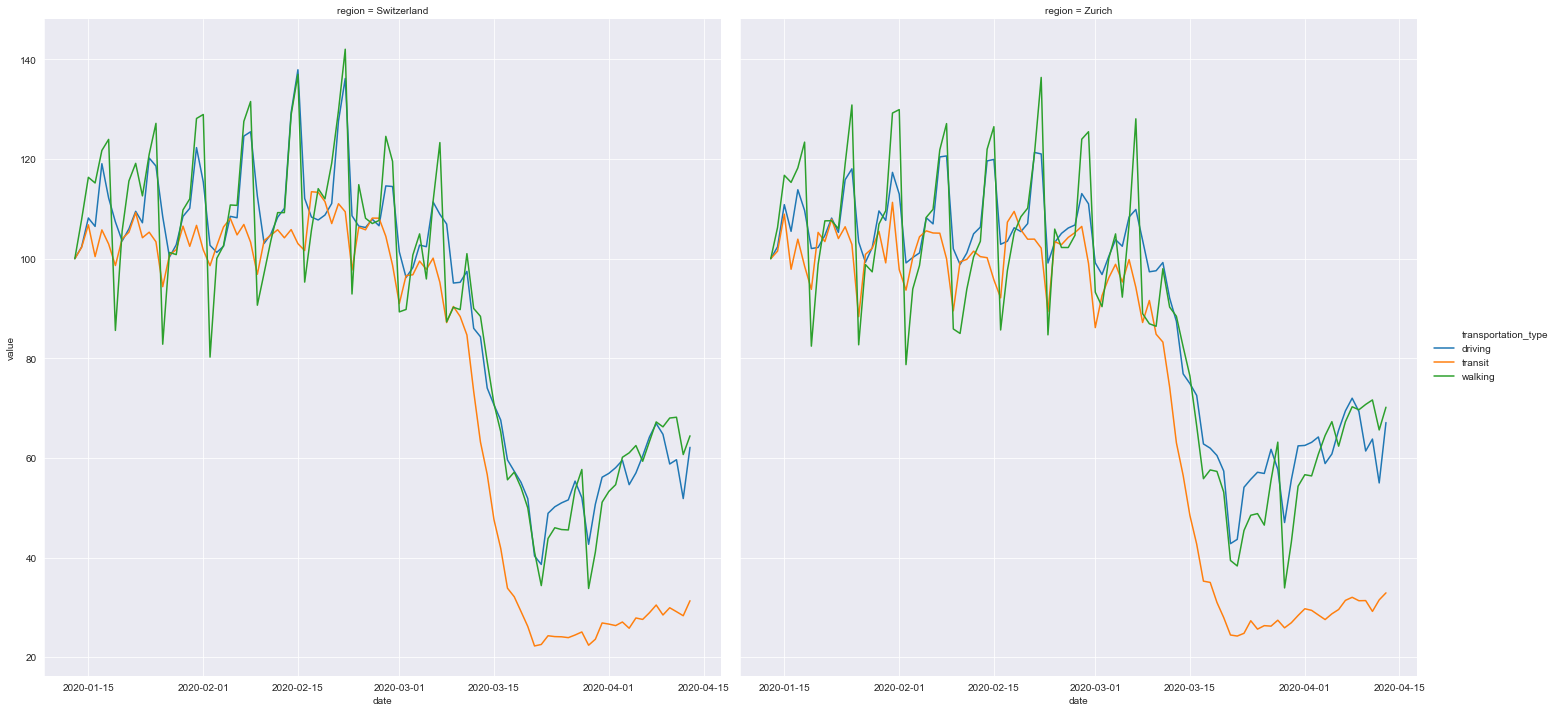

In [79]:
plt.figure(figsize=(30, 20))
sns.relplot(
    x="date",  # "dayofyear",
    y="value",
    hue="transportation_type",
    data=apple_mobility_ch,
    col="region",
    kind="line",
    height=10,
)
plt.savefig("apple_schweiz_mobility.png")

In [66]:
apple_mobility_ch.date.min()

Timestamp('2020-01-13 00:00:00')

In [77]:
datetime.now()

datetime.datetime(2020, 4, 15, 10, 32, 20, 670079)